# Comparison study between fasttext and TF-IDF

A very simple study of accuracy between using fasttext and TF-IDF (term frequency inverse document frequency), using Language Detection data set from Kaggle

In [1]:
# !/usr/bin/python

import os
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

./.ipynb_checkpoints/Language Detection-checkpoint.csv
./.ipynb_checkpoints/Language Detection-checkpoint.ipynb
./Language Detection.ipynb
./Language%20Detection.csv.zip
./Language Detection.csv
./Language Detection
./.ipynb_checkpoints


## Load the data

We will use the Kaggle API to download the dataset from Kaggle.

In [2]:
!pip install kaggle

In [3]:
import kaggle

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [5]:
api = KaggleApi()
api.authenticate()

In [6]:
api.dataset_download_file("basilb2s/language-detection", file_name="Language Detection.csv")

False

In [7]:
import zipfile

In [8]:
with zipfile.ZipFile('Language%20Detection.csv.zip', 'r') as zipref:
    zipref.extractall()

## Preprocessing the data

Data shape, graph visualization, and prepare data for training

### Load data set

In [9]:
import pandas as pd

df = pd.read_csv('Language Detection.csv')

In [10]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [13]:
df = df.sample(frac=1)
df.head()

,Text,Language
4423,"Veel leerproblemen zijn NP-hard of moeilijker,...",Dutch
6408,"заранее спасибо, если кто-то допустил ошибку, ...",Russian
2370,நீ அதை பற்றி என்ன நினைக்கிறாய்?,Tamil
2341,விஷயங்கள் எப்படி இருக்கின்றன?,Tamil
7175,In questo caso la neutralità e le reciproche o...,Italian


In [19]:
df.Language.replace(to_replace=['Portugeese','Sweedish'],value=['Portuguese','Swedish'],inplace=True)

In [20]:
df.shape

(10337, 2)

### Visualize data

In [24]:
import plotly.express as px

In [27]:
lang_table = df.groupby('Language').count().reset_index()
print(lang_table)

      Language  Text
0       Arabic   536
1       Danish   428
2        Dutch   546
3      English  1385
4       French  1014
5       German   470
6        Greek   365
7        Hindi    63
8      Italian   698
9      Kannada   369
10   Malayalam   594
11  Portuguese   739
12     Russian   692
13     Spanish   819
14     Swedish   676
15       Tamil   469
16     Turkish   474


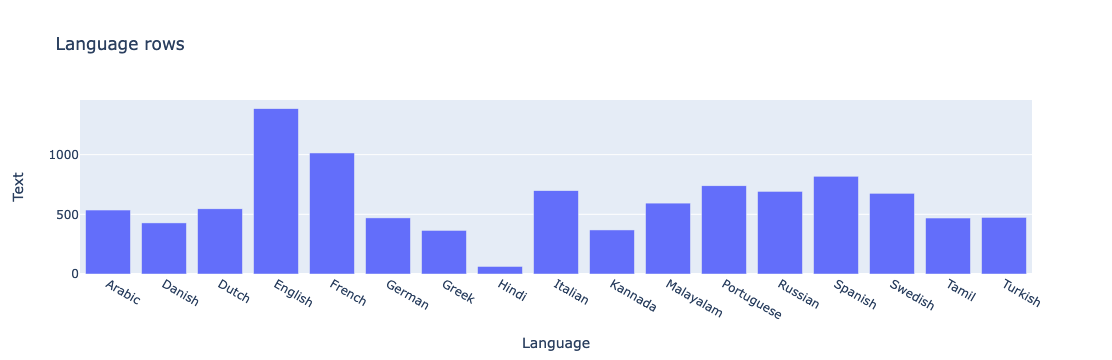

In [29]:
# plot structure
fig = px.bar(lang_table,
             x='Language',
             y='Text',
             title='Language rows',
             #color='Items',
             barmode='stack')

# plot
fig.show()